<h1>Table of Contents<span class="tocSkip"></span></h1>


# Introduction
<hr style = "border:2px solid black" ></hr>


**What?** TPOT on the sonar dataset Classification



# What is TPOT?
<hr style = "border:2px solid black" ></hr>


- Automated Machine Learning (AutoML) with TPOT python library applied to the sonar dataset (classification problem).
- TPOT uses a Genetic Programming stochastic global search procedure to efficiently discover a top-performing model pipeline for a given dataset. 
- **TPOT** stands for Tree-based Pipeline Optimization Tool.



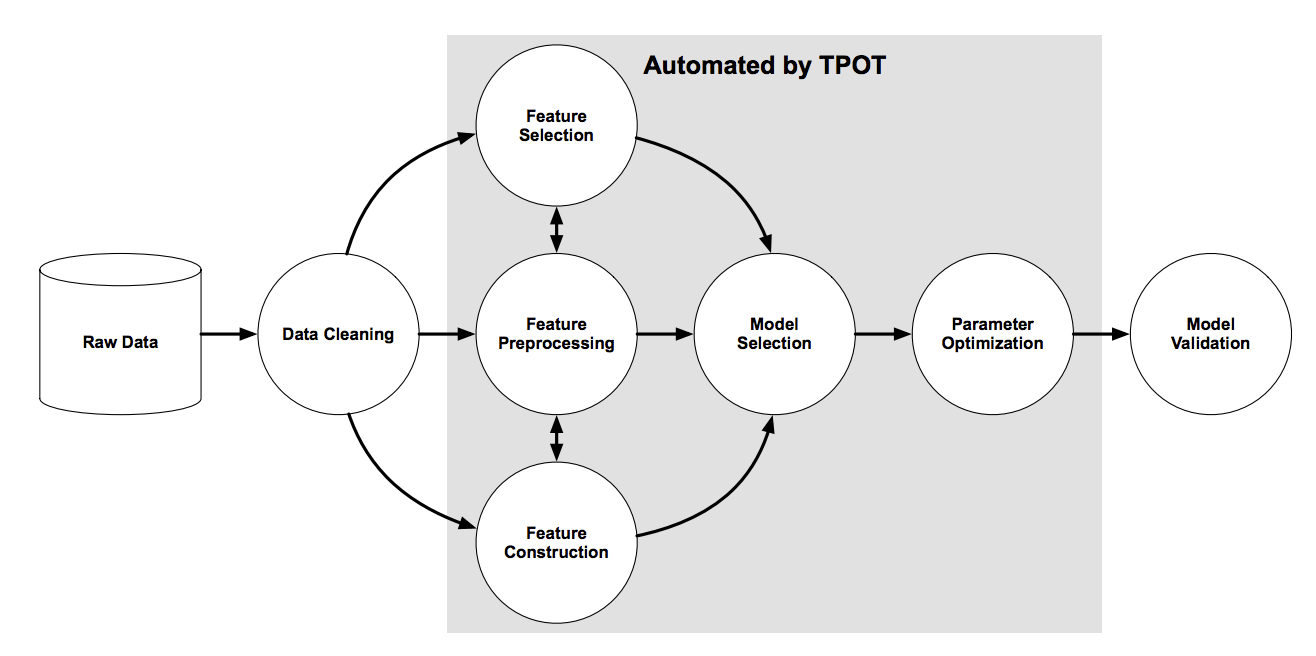

# Import modules
<hr style = "border:2px solid black" ></hr>

In [21]:
import tpot
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.svm import LinearSVC
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

# Load & prepare the dataset
<hr style = "border:2px solid black" ></hr>


- The sonar dataset is a standard machine learning dataset comprised of 208 rows of data with 60 numerical input variables and a target variable with two class values, e.g. binary classification. 

- The dataset involves predicting whether sonar returns indicate a rock or simulated mine.



In [22]:
dataframe = read_csv("../DATASETS/sonar.csv", header=None)

# split into input and output elements
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

# minimally prepare dataset
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

(208, 60) (208,)


# Split the data
<hr style = "border:2px solid black" ></hr>

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.75, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((156, 60), (52, 60), (156,), (52,))

# Prepare model for TPOT
<hr style = "border:2px solid black" ></hr>


- As an evolutionary algorithm, this involves setting configuration, such as the size of the population, the  number of generations to run, and potentially crossover and mutation rates. 

- The former importantly control the extent of the search; the latter can be left on default values if evolutionary search is new to you.

- Since it may take a lonf time to finish: it offers an option to interrupt the run partway through and see  the best results so far. TPOT also provides a warm_start parameter that lets you restart a TPOT run from where it left off.



In [26]:
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search
model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2,
                       random_state=1, n_jobs=-1, max_time_mins=10)

In [27]:
# perform the search
model.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/50 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8545833333333335

Generation 2 - Current best internal CV score: 0.8545833333333335

Generation 3 - Current best internal CV score: 0.8711111111111112

Generation 4 - Current best internal CV score: 0.8711111111111112

Generation 5 - Current best internal CV score: 0.8711111111111112

Best pipeline: ExtraTreesClassifier(GradientBoostingClassifier(LinearSVC(input_matrix, C=0.001, dual=False, loss=squared_hinge, penalty=l1, tol=0.01), learning_rate=0.5, max_depth=8, max_features=0.35000000000000003, min_samples_leaf=6, min_samples_split=18, n_estimators=100, subsample=0.8500000000000001), bootstrap=False, criterion=gini, max_features=0.3, min_samples_leaf=6, min_samples_split=12, n_estimators=100)


TPOTClassifier(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
               generations=5, max_time_mins=10, n_jobs=-1, population_size=50,
               random_state=1, scoring='accuracy', verbosity=2)

In [33]:
print("Score on the train set: ", model.score(X_train, y_train))
print("Score on the test set: ", model.score(X_test, y_test))
print("Score on the all set: ", model.score(X, y))

# export the best model
model.export('tpot_sonar_best_model.py')

Score on the train set:  1.0
Score on the test set:  0.8653846153846154
Score on the all set:  0.9663461538461539


In [ ]:
"""
Has the model overfit the trainin data?
"""

# Output python pipeline
<hr style = "border:2px solid black" ></hr>


- The top-performing pipeline is then saved to a file named `tpot_sonar_best_model.py“`.

- Opening this file, you can see that there is some generic code for loading a dataset and fitting the pipeline.

- As-is, this code does not execute, by design. It is a template that you can copy-and-paste into your project.

- An example is listed below. We still report below so you can compare what you have to do to make it run.
    


In [ ]:
# !!!!! AGAIN DO NOT RUN THIS CODE - IT WILL NOT RUN !!!!
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.svm import LinearSVC
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE',
                        sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
    train_test_split(features, tpot_data['target'], random_state=1)

# Average CV score on the training set was: 0.8711111111111112
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=LinearSVC(C=0.001, dual=False,
                      loss="squared_hinge", penalty="l1", tol=0.01)),
    StackingEstimator(estimator=GradientBoostingClassifier(learning_rate=0.5, max_depth=8, max_features=0.35000000000000003,
                      min_samples_leaf=6, min_samples_split=18, n_estimators=100, subsample=0.8500000000000001)),
    ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.3,
                         min_samples_leaf=6, min_samples_split=12, n_estimators=100)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 1)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

In [ ]:
"""
In this case, we can see that the top-performing pipeline achieved the mean accuracy of about 87.11 percent.
This is a skillful model, and close to a top-performing model on this dataset.
"""

# Runnable pipeline
<hr style = "border:2px solid black" ></hr>


- What follows is a copy and past of the model suggested by TPOT. 
- The only reason I have reported the imports here is for easy comparison. So you know what was copied and what was not!



In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.svm import LinearSVC
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

# load dataset
#url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv'
#dataframe = read_csv(url, header=None)
dataframe = read_csv("../DATASETS/sonar.csv", header=None)

# split into input and output elements
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# minimally prepare dataset
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

In [ ]:
"""
Below is reported the most important piece of information: the model we were looking for: an "optimal" model!
"""

In [ ]:
# ----------------------------- Start of optimal suggested model -----------------------------
# Average CV score on the training set was: 0.8711111111111112
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=LinearSVC(C=0.001, dual=False,
                      loss="squared_hinge", penalty="l1", tol=0.01)),
    StackingEstimator(estimator=GradientBoostingClassifier(learning_rate=0.5, max_depth=8,
                                                           max_features=0.35000000000000003, min_samples_leaf=6,
                                                           min_samples_split=18, n_estimators=100,
                                                           subsample=0.8500000000000001)),
    ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.3, min_samples_leaf=6,
                         min_samples_split=12, n_estimators=100)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 1)
# ----------------------------- End of optimal suggested model -----------------------------

In [ ]:
"""
Use the model to make a prediction
"""

In [48]:
# fit the model
exported_pipeline.fit(X, y)
# make a prediction on a new row of data
row = [0.0200, 0.0371, 0.0428, 0.0207, 0.0954, 0.0986, 0.1539, 0.1601, 0.3109, 0.2111, 0.1609, 0.1582, 0.2238, 0.0645, 0.0660,
       0.2273, 0.3100, 0.2999, 0.5078, 0.4797, 0.5783, 0.5071, 0.4328, 0.5550, 0.6711, 0.6415, 0.7104, 0.8080, 0.6791, 0.3857,
       0.1307, 0.2604, 0.5121, 0.7547, 0.8537, 0.8507, 0.6692, 0.6097, 0.4943, 0.2744, 0.0510, 0.2834, 0.2825, 0.4256, 0.2641,
       0.1386, 0.1051, 0.1343, 0.0383, 0.0324, 0.0232, 0.0027, 0.0065, 0.0159, 0.0072, 0.0167, 0.0180, 0.0084, 0.0090, 0.0032]
print("Lenght of input values used for the prediction: ", len(row))
yhat = exported_pipeline.predict([row])
print('Predicted: %.3f' % yhat[0])

Lenght of input values used for the prediction:  60
Predicted: 1.000


# References
<hr style="border:2px solid black"> </hr>


- https://machinelearningmastery.com/tpot-for-automated-machine-learning-in-python/
- https://epistasislab.github.io/tpot/
- https://dl.acm.org/doi/10.1145/2908812.2908918
- [Sonar dataset download](https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv)
- [TPOT official examples](https://github.com/EpistasisLab/tpot/tree/master/tutorials)

